# Tarea M35-AD – Jose Alberto Hernandez Moran

In [1]:
import pandas as pd
import numpy as np

# 1. Importar el archivo
df = pd.read_csv('supermarket_sales.csv')


In [2]:
# Reviso los datos del archivo
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
177,139-52-2867,C,Naypyitaw,Normal,Female,Fashion accessories,22.51,7,7.8785,165.4485,2/13/2019,10:50,Credit card,157.57,4.761905,7.8785,4.8
726,442-44-6497,C,Naypyitaw,Member,Male,Home and lifestyle,55.57,3,8.3355,175.0455,1/8/2019,11:42,Credit card,166.71,4.761905,8.3355,5.9
559,218-59-9410,A,Yangon,Member,Female,Home and lifestyle,72.42,3,10.8630,228.1230,3/29/2019,16:54,Ewallet,217.26,4.761905,10.8630,8.2


In [91]:
# Convierto las columnas que voy usando en arreglos
np.city = df['City'].to_numpy()
np.gender = df['Gender'].to_numpy()
np.product_line = df['Product line'].to_numpy()
np.unit_price = df['Unit price'].to_numpy()
np.quantity = df['Quantity'].to_numpy()
np.total = df['Total'].to_numpy()


# Estadistica Descriptiva

In [92]:
# 3: Estadística Descriptiva Básica
mean_price = np.mean(np.unit_price)
print(f'La media del precio de los productos es: {mean_price:.2f}')
median_price = np.median(np.unit_price)
print(f"La mediana del precio de los productos es: {median_price:.2f}")
vals, counts = np.unique(np.unit_price, return_counts=True)
index = np.argmax(counts) #El indice del precio mas contado
moda_price = vals[index]
print(f"La moda de los precios es = {moda_price:.2f} ")

La media del precio de los productos es: 55.67
La mediana del precio de los productos es: 55.23
La moda de los precios es = 83.77 


In [93]:
mean_quantity = np.mean(np.quantity)
print(f'La media de la cantidad de productos vendidos es: {mean_quantity:.2f}')
median_quantity = np.median(np.quantity)
print(f"La mediana de la cantidad de productos vendidos es: {median_quantity:.2f}")
vals, counts = np.unique(np.quantity, return_counts=True)
index = np.argmax(counts) #El indice del precio mas contado
moda_quantity = vals[index]
print(f"La moda de la cantidad de productos vendidos es = {moda_quantity:.2f} ")

La media de la cantidad de productos vendidos es: 5.51
La mediana de la cantidad de productos vendidos es: 5.00
La moda de la cantidad de productos vendidos es = 10.00 


# Ticket Promedio

In [ ]:
# Ticket promedio
# 1. por ciudad
cities = np.unique(np.city)
city_avg = [df[df['City'] == city]['Total'].mean() for city in cities]
print("Por ciudad:")
for city, avg in zip(cities, city_avg):
    print(f"El ticket promedio para {city}: {avg:.2f}")

Por ciudad:
El ticket promedio para Mandalay: 319.87
El ticket promedio para Naypyitaw: 337.10
El ticket promedio para Yangon: 312.35


In [95]:
# 2. por product line y ciudad
product_lines = np.unique(np.product_line)
for product_line in product_lines:
    for city in cities:
        avg = df[(df['Product line'] == product_line) & (df['City'] == city)]['Total'].mean()
        if not np.isnan(avg):
            print(f"Para la linea de productos {product_line} y ciudad {city}, el ticket promedio es: {avg:.2f}")

Para la linea de productos Electronic accessories y ciudad Mandalay, el ticket promedio es: 310.03
Para la linea de productos Electronic accessories y ciudad Naypyitaw, el ticket promedio es: 344.89
Para la linea de productos Electronic accessories y ciudad Yangon, el ticket promedio es: 305.29
Para la linea de productos Fashion accessories y ciudad Mandalay, el ticket promedio es: 264.73
Para la linea de productos Fashion accessories y ciudad Naypyitaw, el ticket promedio es: 331.69
Para la linea de productos Fashion accessories y ciudad Yangon, el ticket promedio es: 320.25
Para la linea de productos Food and beverages y ciudad Mandalay, el ticket promedio es: 304.30
Para la linea de productos Food and beverages y ciudad Naypyitaw, el ticket promedio es: 360.10
Para la linea de productos Food and beverages y ciudad Yangon, el ticket promedio es: 295.92
Para la linea de productos Health and beauty y ciudad Mandalay, el ticket promedio es: 376.99
Para la linea de productos Health and b

In [96]:
# 3. por género
genders = np.unique(np.gender)
for gender in genders:
    avg = df[df['Gender'] == gender]['Total'].mean()
    print(f"El ticket promedio en el genero {gender}:  es {avg:.2f}")

El ticket promedio en el genero Female:  es 335.10
El ticket promedio en el genero Male:  es 310.79


In [97]:
# 4. por género y product line
for gender in genders:
    for product_line in product_lines:
        avg = df[(df['Gender'] == gender) & (df['Product line'] == product_line)]['Total'].mean()
        if not np.isnan(avg):
            print(f"El ticket promedio en el genero {gender} y linea de producto {product_line} es: {avg:.2f}")

El ticket promedio en el genero Female y linea de producto Electronic accessories es: 322.64
El ticket promedio en el genero Female y linea de producto Fashion accessories es: 317.06
El ticket promedio en el genero Female y linea de producto Food and beverages es: 368.57
El ticket promedio en el genero Female y linea de producto Health and beauty es: 290.02
El ticket promedio en el genero Female y linea de producto Home and lifestyle es: 380.21
El ticket promedio en el genero Female y linea de producto Sports and travel es: 324.71
El ticket promedio en el genero Male y linea de producto Electronic accessories es: 316.69
El ticket promedio en el genero Male y linea de producto Fashion accessories es: 291.08
El ticket promedio en el genero Male y linea de producto Food and beverages es: 273.50
El ticket promedio en el genero Male y linea de producto Health and beauty es: 348.10
El ticket promedio en el genero Male y linea de producto Home and lifestyle es: 294.14
El ticket promedio en el

# Top

In [98]:
# Top
# 1. ventas por ciudad
city_sales = df.groupby('City')['Total'].sum()
city_sales_rank = city_sales.rank(method='dense', ascending=False)
top_5_city_sales = city_sales_rank <= 5
print("Ventas por ciudad:")
for city, sales in city_sales[top_5_city_sales].items():
    print(f"{city}: {sales:,.2f} ({sales / city_sales.sum() * 100:.2f}%)")

Ventas por ciudad:
Mandalay: 106,197.67 (32.88%)
Naypyitaw: 110,568.71 (34.24%)
Yangon: 106,200.37 (32.88%)


In [99]:
# 2. ventas por member
member_sales = df.groupby('Customer type')['Total'].sum()
member_sales_rank = member_sales.rank(method='dense', ascending=False)
top_5_member_sales = member_sales_rank <= 5
print("\nVentas por member:")
for member, sales in member_sales[top_5_member_sales].items():
    print(f"{member}: {sales:,.2f} ({sales / member_sales.sum() * 100:.2f}%)")


Ventas por member:
Member: 164,223.44 (50.85%)
Normal: 158,743.30 (49.15%)


In [100]:
# 3. ventas por payment
payment_sales = df.groupby('Payment')['Total'].sum()
payment_sales_rank = payment_sales.rank(method='dense', ascending=False)
top_5_payment_sales = payment_sales_rank <= 5
print("\nVentas por payment:")
for payment, sales in payment_sales[top_5_payment_sales].items():
    print(f"{payment}: {sales:,.2f} ({sales / payment_sales.sum() * 100:.2f}%)")


Ventas por payment:
Cash: 112,206.57 (34.74%)
Credit card: 100,767.07 (31.20%)
Ewallet: 109,993.11 (34.06%)


# Correlacion

Text(0.5, 1.0, 'Mapa de calor de triangulo de Corerelacion')

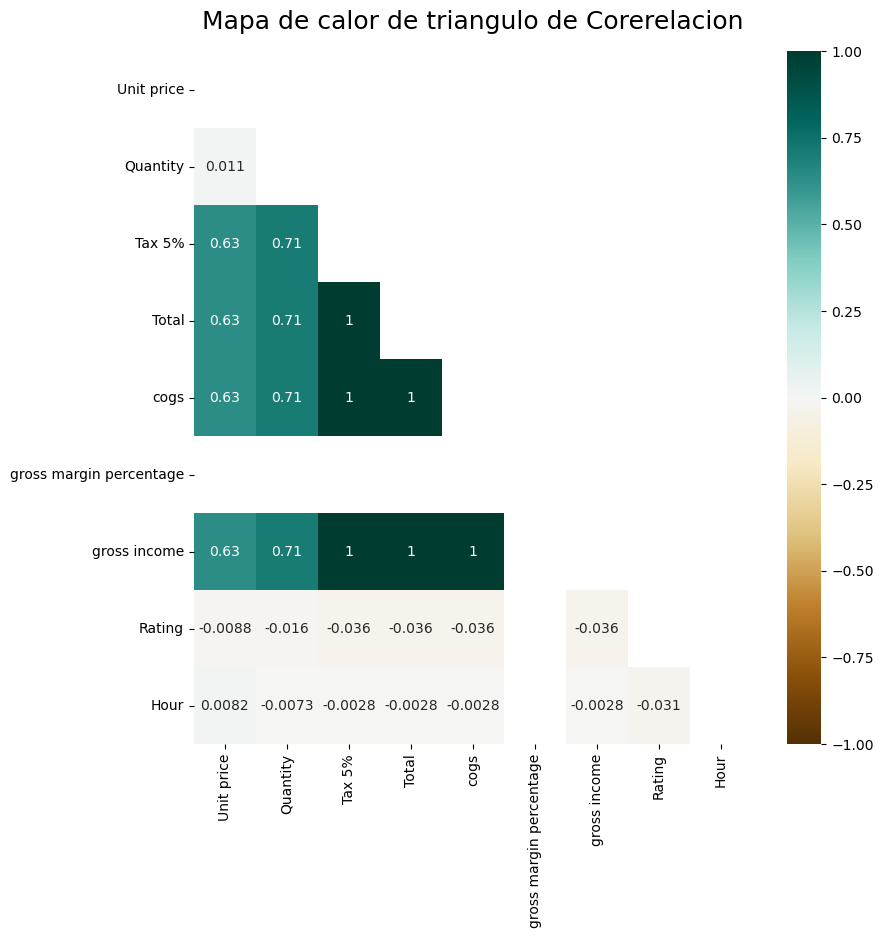

In [101]:
# Matriz de Correlacion de todo el DataFrame
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(9,9))
mask= np.triu(np.ones_like(df.select_dtypes(include='number').corr(), dtype=bool))
heatmap = sb.heatmap(df.select_dtypes(include='number').corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de triangulo de Corerelacion', fontdict={'fontsize':18}, pad=16)

Correlación entre hora y total: -0.0028


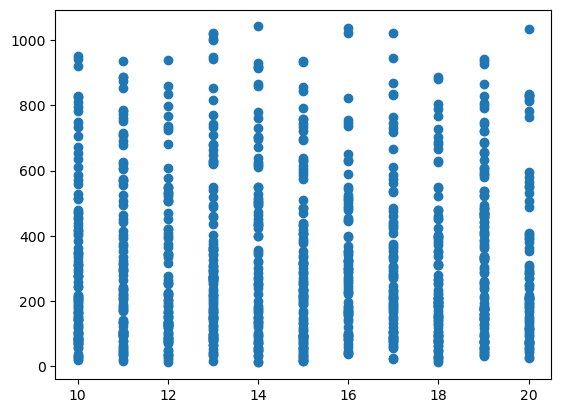

In [102]:
# Correlación
# 1. hora (sin minutos) y total
df['Hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]))
hour_total_corr = np.corrcoef(df['Hour'].values, df['Total'].values)[0, 1]
print(f"Correlación entre hora y total: {hour_total_corr:.4f}")

plt.scatter(x=df['Hour'].values, y=df['Total'].values)


Correlación entre unit_price y rating: -0.0088


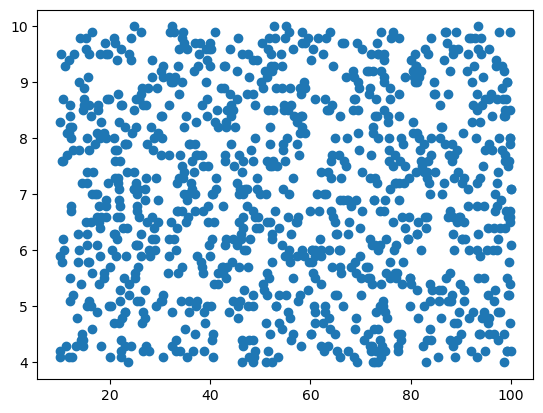

In [103]:
# 2. unit_price y rating
unit_price_rating_corr = np.corrcoef(df['Unit price'].values, df['Rating'].values)[0, 1]
print(f"Correlación entre unit_price y rating: {unit_price_rating_corr:.4f}")

plt.scatter(x=df['Unit price'].values, y=df['Rating'].values)

Correlación entre unit_price y rating: 0.7055


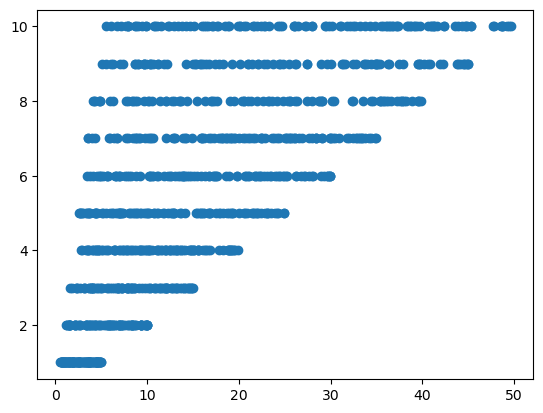

In [104]:
# Agregue una de las correlaciones mas alta para observar el comportamiento en la imagen
gross_income_qty_corr = np.corrcoef(df['gross income'].values, df['Quantity'].values)[0, 1]
print(f"Correlación entre unit_price y rating: {gross_income_qty_corr :.4f}")
plt.scatter(x=df['gross income'].values, y=df['Quantity'].values)